In [1]:
import pandas as pd
import re

# Read .csv file
df = pd.read_csv('final-data.csv')

# Convert object (or str) to numeric type to calculate
df['Discounted Price'] = pd.to_numeric(df['Discounted Price'], errors='coerce')
df['Original Price'] = pd.to_numeric(df['Original Price'], errors='coerce')
df['Review Counts'] = pd.to_numeric(df['Review Counts'].apply(lambda x: re.sub(r'[^\d.]', '', x)), errors='coerce')

# Calculate discount rate using the discounted price and original price
df['Discount Rate'] = (df['Original Price'] - df['Discounted Price']) / df['Original Price'] * 100
df['Discount Rate'] = df['Discount Rate'].fillna(0)  # 결측값을 0으로 채우기

# Calculate numeric statics including mean, median (= 50%), std
print("[Discounted Price]")
print(df['Discounted Price'].describe())
print("=======")

print("[Original Price]")
print(df['Original Price'].describe())
print("=======")

print("[Discount Rate]")
print(df['Discount Rate'].describe())
print("=======")

print("[Review Counts]")
print(df['Review Counts'].describe())

[Discounted Price]
count    6388.000000
mean       31.229787
std        55.493464
min         0.220000
25%        10.000000
50%        19.920000
75%        33.230000
max       986.390000
Name: Discounted Price, dtype: float64
[Original Price]
count    6388.000000
mean       34.021357
std        57.005271
min         0.220000
25%        10.500000
50%        22.000000
75%        36.000000
max       986.390000
Name: Original Price, dtype: float64
[Discount Rate]
count    6400.000000
mean        7.326311
std        14.255586
min         0.000000
25%         0.000000
50%         0.000000
75%        10.000000
max        75.066667
Name: Discount Rate, dtype: float64
[Review Counts]
count      6400.000000
mean       3138.832500
std        6643.209963
min           0.000000
25%         120.750000
50%         893.000000
75%        2945.000000
max      133428.000000
Name: Review Counts, dtype: float64


Badge
Etsy's Pick    3662
No badge       2738
Name: count, dtype: int64


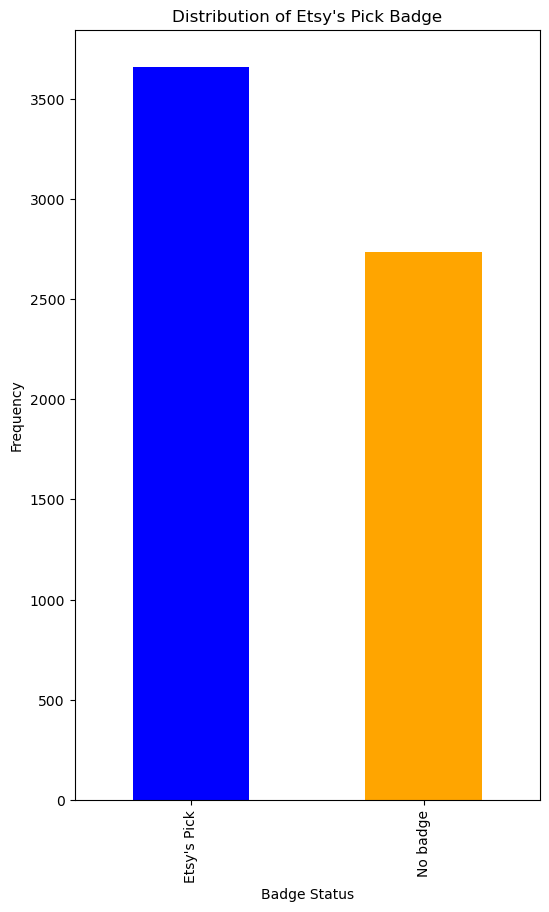

In [2]:
import matplotlib.pyplot as plt

# Count the column of 'Etsy's Pick'
df["Badge"] = df["Badge"].str.strip().str.replace('\n', '').str.replace('’', "'")
badge_counts = df["Badge"].value_counts()

# Print a frequency table
print(badge_counts)

# Visualization of categorical variable (= Badge) using the bar graph
plt.figure(figsize=(6, 10))
badge_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribution of Etsy's Pick Badge")
plt.xlabel("Badge Status")
plt.ylabel("Frequency")
plt.show()

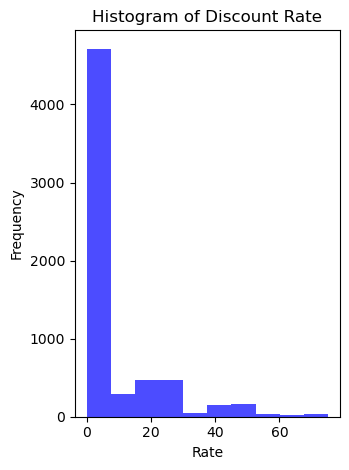

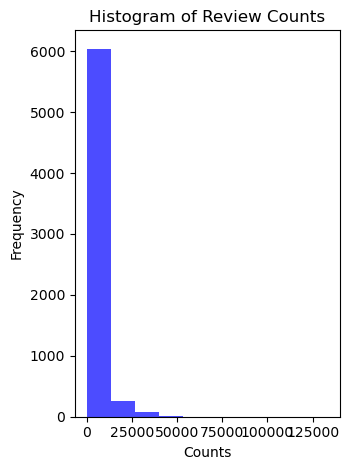

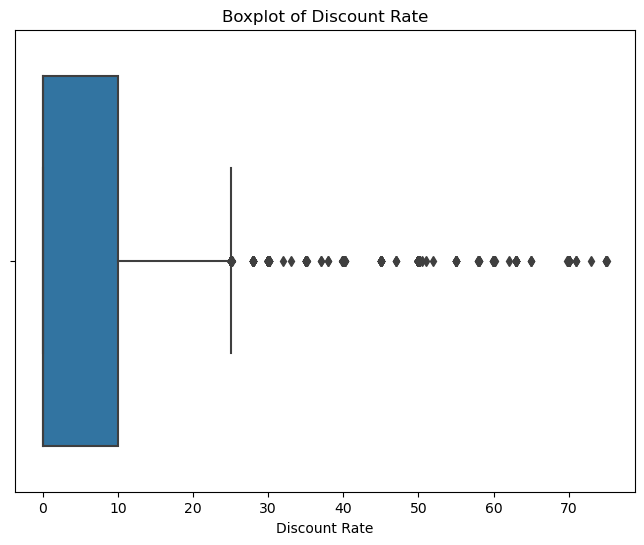

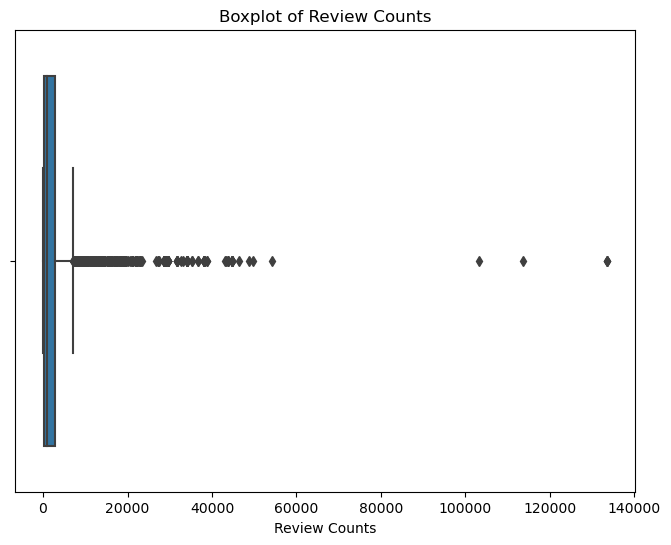

In [3]:
import seaborn as sns

# Make histogram of the Discount Rate
plt.subplot(1, 2, 1)
plt.hist(df['Discount Rate'], bins=10, color='blue', alpha=0.7)
plt.title("Histogram of Discount Rate")
plt.xlabel("Rate")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Make histogram of the Review Counts
plt.subplot(1, 2, 1)
plt.hist(df['Review Counts'], bins=10, color='blue', alpha=0.7)
plt.title("Histogram of Review Counts")
plt.xlabel("Counts")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Make the box plot of the Discount Rate
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Discount Rate'])
plt.title("Boxplot of Discount Rate")
plt.show()

# Make the box plot of the Review Counts
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Review Counts'])
plt.title("Boxplot of Review Counts")
plt.show()

0.10971606884428392


/Users/seori/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


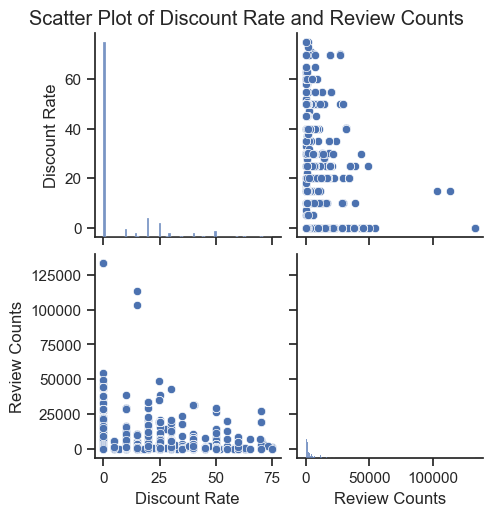

In [9]:
# Calculate correlation between 'Discount Rate' and 'Review Counts'
corr = df['Discount Rate'].corr(df['Review Counts'])
print(corr) # Result: very little correlation

predictor_var = ['Discount Rate', 'Review Counts']
predictor_df = df[predictor_var]

# Scatter Plot
sns.set(style="ticks", color_codes=True)
scatter_plot = sns.pairplot(predictor_df)
plt.suptitle("Scatter Plot of Discount Rate and Review Counts", y=1.02)
plt.show()

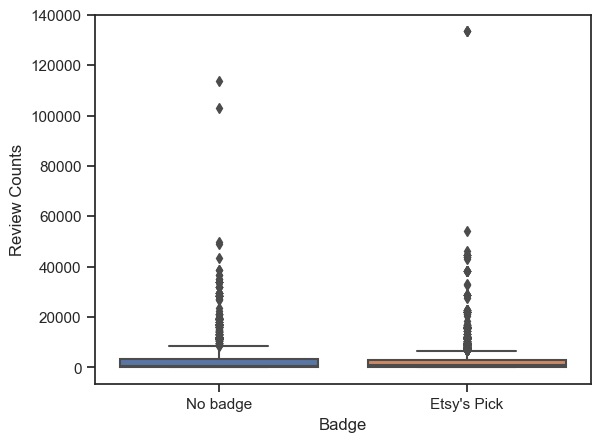

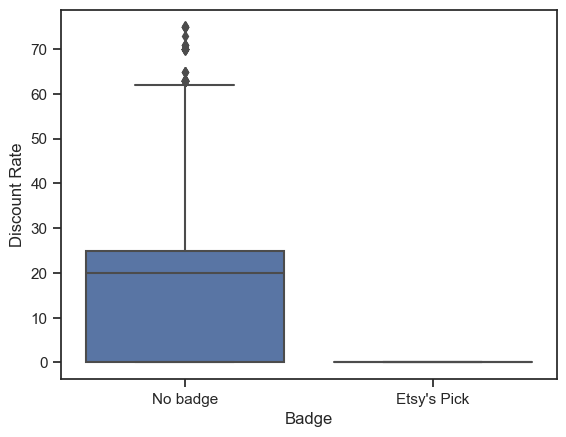

In [5]:
# Visualize the correlation between the categorical variable and numeric variable
sns.boxplot(x=df['Badge'], y=df['Review Counts'], data=df)
plt.show()

sns.boxplot(x=df['Badge'], y=df['Discount Rate'], data=df)
plt.show()

In [6]:
import scipy.stats

# Calculate the Point-Biserial Correlation Coefficient
corr_badge_review = scipy.stats.pointbiserialr(df['Badge'].map({'No badge': 0, "Etsy's Pick": 1}), df['Review Counts'])
corr_badge_discount = scipy.stats.pointbiserialr(df['Badge'].map({'No badge': 0, "Etsy's Pick": 1}), df['Discount Rate'])

# Correlation between the Badge and the Discount Rate
print(f"Point-Biserial Correlation Coefficient between badge and discount rate: {corr_badge_discount.correlation}")
print(f"P-value: {corr_badge_discount.pvalue}\n")
# Correlation between the Badge and the Review Counts
print(f"Point-Biserial Correlation Coefficient between badge and review counts: {corr_badge_review.correlation}")
print(f"P-value: {corr_badge_review.pvalue}")

Point-Biserial Correlation Coefficient between badge and discount rate: -0.5943970311860488
P-value: 0.0

Point-Biserial Correlation Coefficient between badge and review counts: -0.034238652504330114
P-value: 0.006155887265821593
